# Lung Cancer Predict
---

1. 데이터 로드
- 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
- 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.
2. 데이터 구조 및 기초 통계 확인
- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.
3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.
4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.
5. 데이터 정제 및 전처리
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# 1. 데이터 로드
df = pd.read_csv('./data/cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [122]:
# 2. 데이터 구조 및 통계 확인인
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

1. 나이(Age)
2. 성별(Gender)
3. 대기오염(Air Pollution)
4. 알코올 사용(Alcohol use)
5. 먼지 알러지(Dust Allergy)
6. 직업적 위험(OccuPational Hazards)
7. 유전적 위험(Genetic Risk)
8. 만성 폐질환(chronic Lung Disease)
9. 균형식단(Balanced Diet)
10. 비만(Obesity)
11. 흡연(Smoking)
12. 수동흡연자? 간접흡연자(Passive Smoker)
13. 흉통(Chest Pain)
14. 객혈(Coughing of Blood)
15. 피로(Fatigue)
16. 체중감량(Weight Loss)
17. 호흡곤란(Shortness of Breath)
18. 천명(Wheezing)
19. 삼키기 어려움(Swallowing Difficulty)
20. 손톱 곤봉(Clubbing of Finger Nails)
21. 잦은 감기(Frequent Cold)
22. 마른 기침(Dry Cough)
23. 코골이(Snoring)
24. 수준(Level)

In [124]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [125]:
# 3. 결측치 및 이상치

# 결측치
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

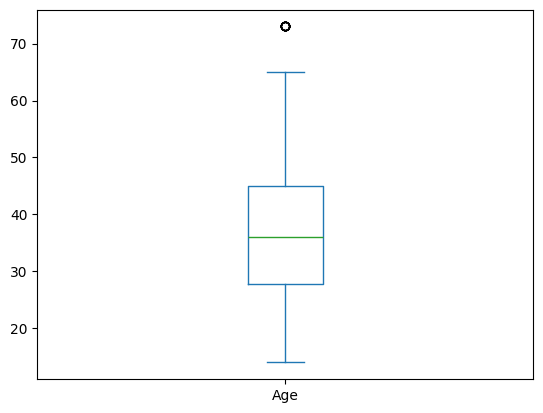

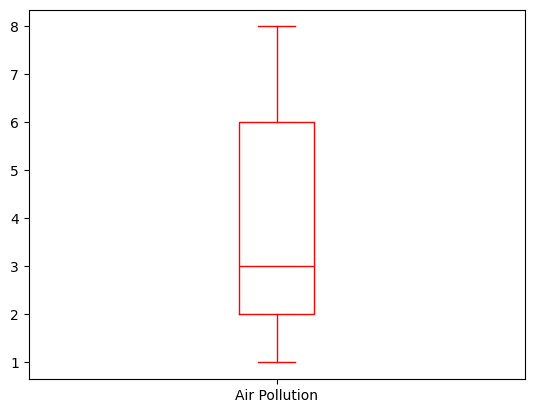

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [126]:
# 이상치
df['Age'].plot(kind='box')
plt.show()
df[df['Age'] < 1]

df['Air Pollution'].plot(kind='box', color='red')
plt.show()
df[df['Air Pollution'] > 8]
df[df['Air Pollution'] < 1]




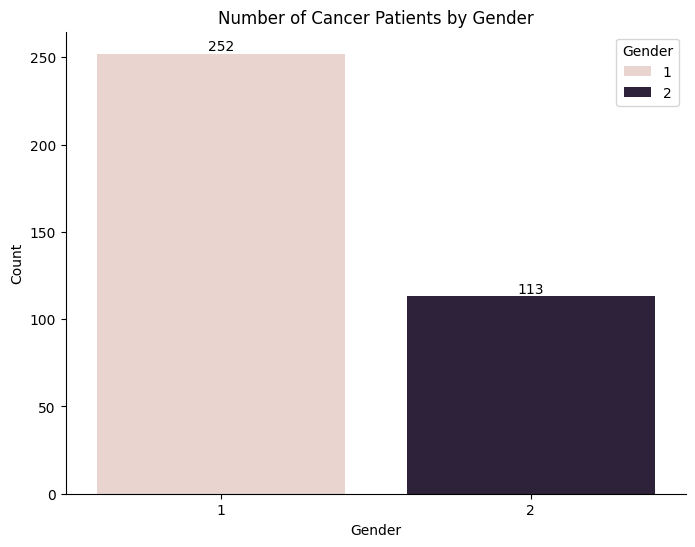

In [127]:

# Level이 3인 암환자만 필터링
cancer_patients = df[df['Level'] == 'High']

gender_counts = cancer_patients['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Gender별 암환자 수 시각화
plt.figure(figsize=(8, 6))
# 막대 위에 수치 표시
ax = sns.countplot(x='Gender', data=cancer_patients, hue='Gender')

# 한 줄로 수치 표시, 높이 0인 막대는 제외
[ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{int(p.get_height())}', 
         ha='center', va='bottom') for p in ax.patches if p.get_height() > 0]


sns.despine()
plt.title('Number of Cancer Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\junhe\AppData\Local\Temp\ipykernel_23152\1948097475.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.countplot(data=df, x='Air Pollution', hue='Level',color='yellow')


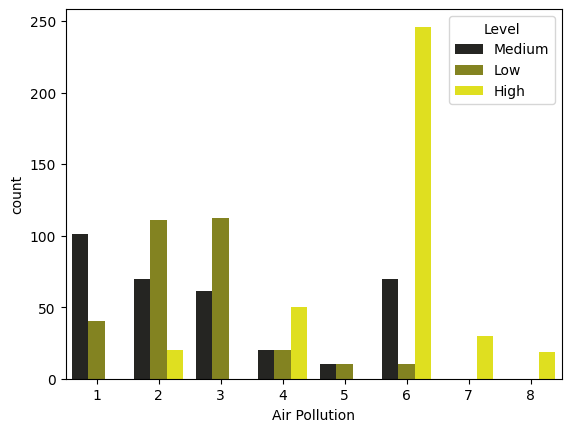

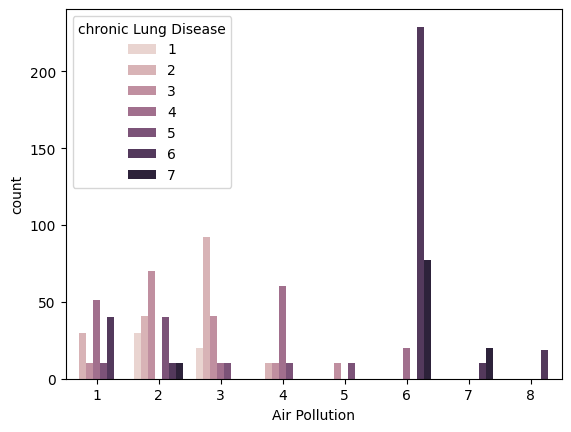

C:\Users\junhe\AppData\Local\Temp\ipykernel_23152\1948097475.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=df, x='Air Pollution', hue='Smoking', color='red')


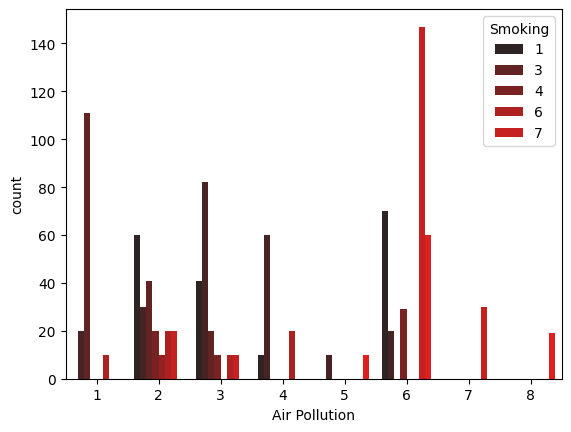

In [128]:
# 4. 데이터 시각화를 통한 탐색
sns.countplot(data=df, x='Air Pollution', hue='Level',color='yellow')
plt.show()

sns.countplot(data=df, x='Air Pollution', hue='chronic Lung Disease')
plt.show()

sns.countplot(data=df, x='Air Pollution', hue='Smoking', color='red')
plt.show()

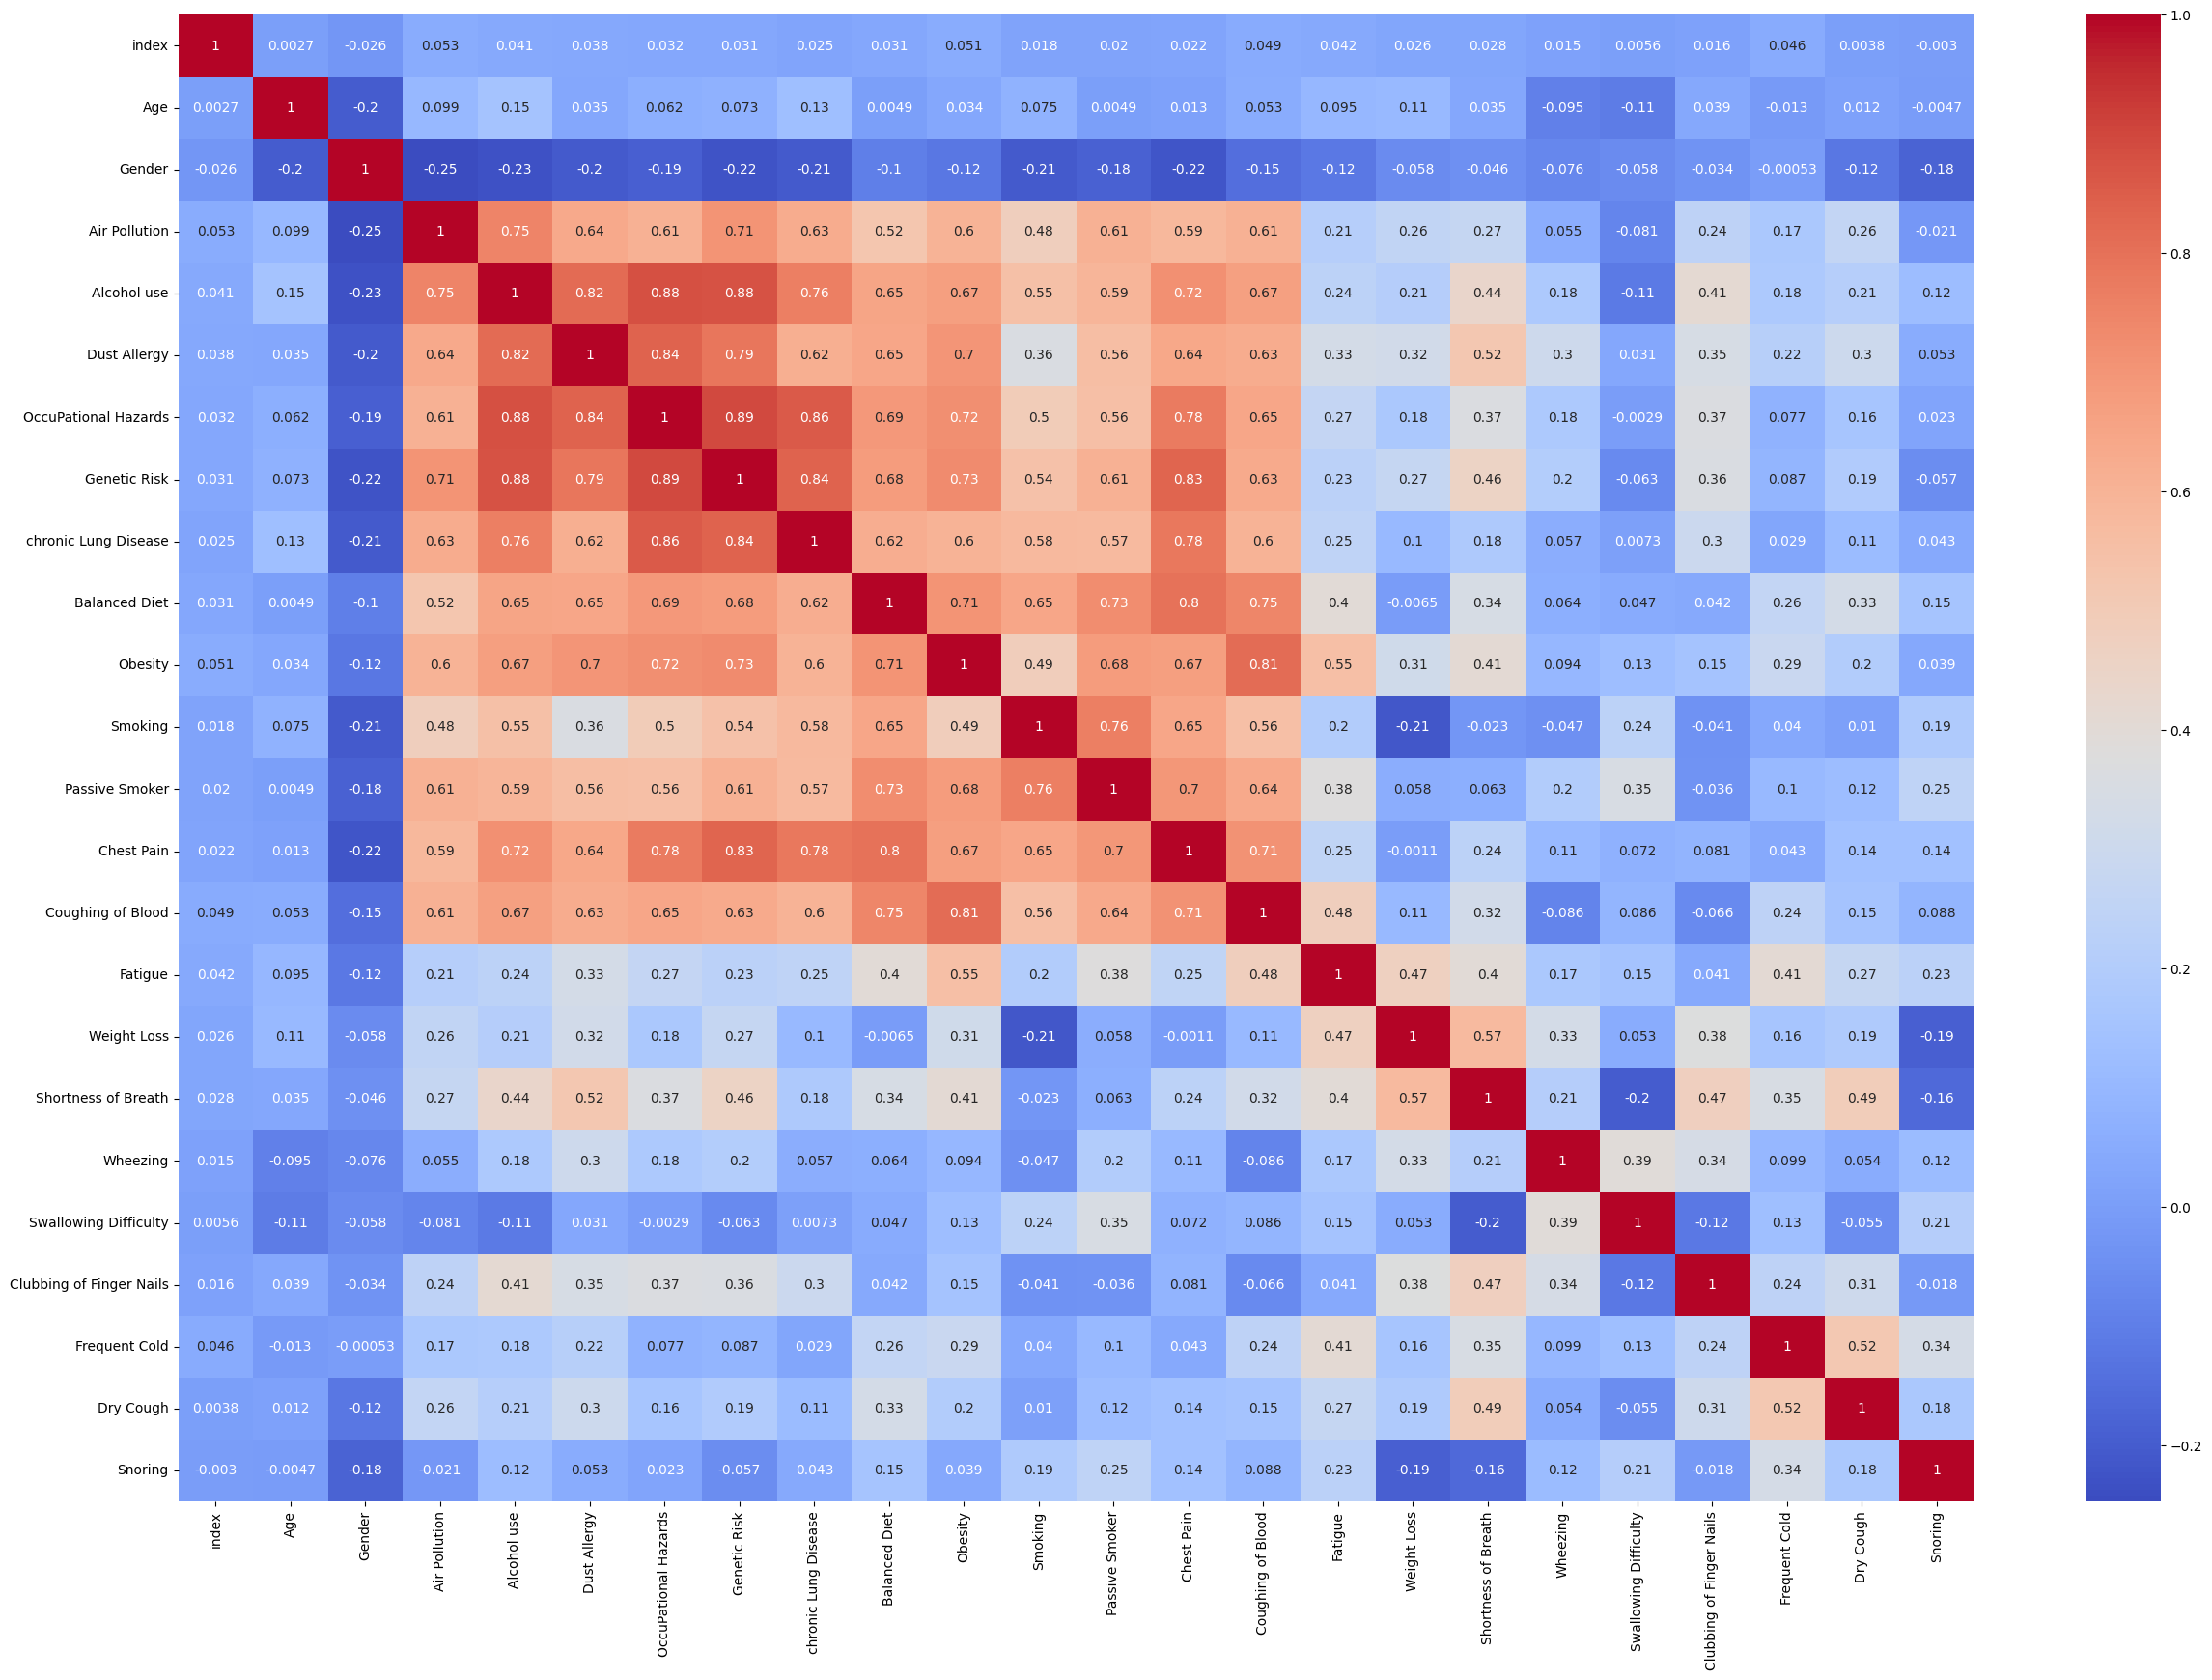

In [129]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [130]:
# 5. 데이터 전처리
df = df.drop(['index',
              'Gender',
              'Age',
              'Fatigue', 
              'Weight Loss', 
              'Shortness of Breath', 
              'Wheezing', 
              'Swallowing Difficulty', 
              'Clubbing of Fi-nger Nails', 
              'Frequent Cold', 
              'Dry Cough',
              'Snoring'],
              axis=1)

df['Level'] = df['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
df

,Patient Id,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Level
0,P1,2,4,5,4,3,2,2,4,3,2,2,4,1
1,P10,3,1,5,3,4,2,2,2,2,4,2,3,2
2,P100,4,5,6,5,5,4,6,7,2,3,4,8,3
3,P1000,7,7,7,7,6,7,7,7,7,7,7,8,3
4,P101,6,8,7,7,7,6,7,7,8,7,7,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,6,7,7,7,7,6,7,7,7,8,7,7,3
996,P996,6,8,7,7,7,6,7,7,7,8,7,7,3
997,P997,4,5,6,5,5,4,6,7,2,3,4,8,3
998,P998,6,8,7,7,7,6,7,7,8,7,7,9,3


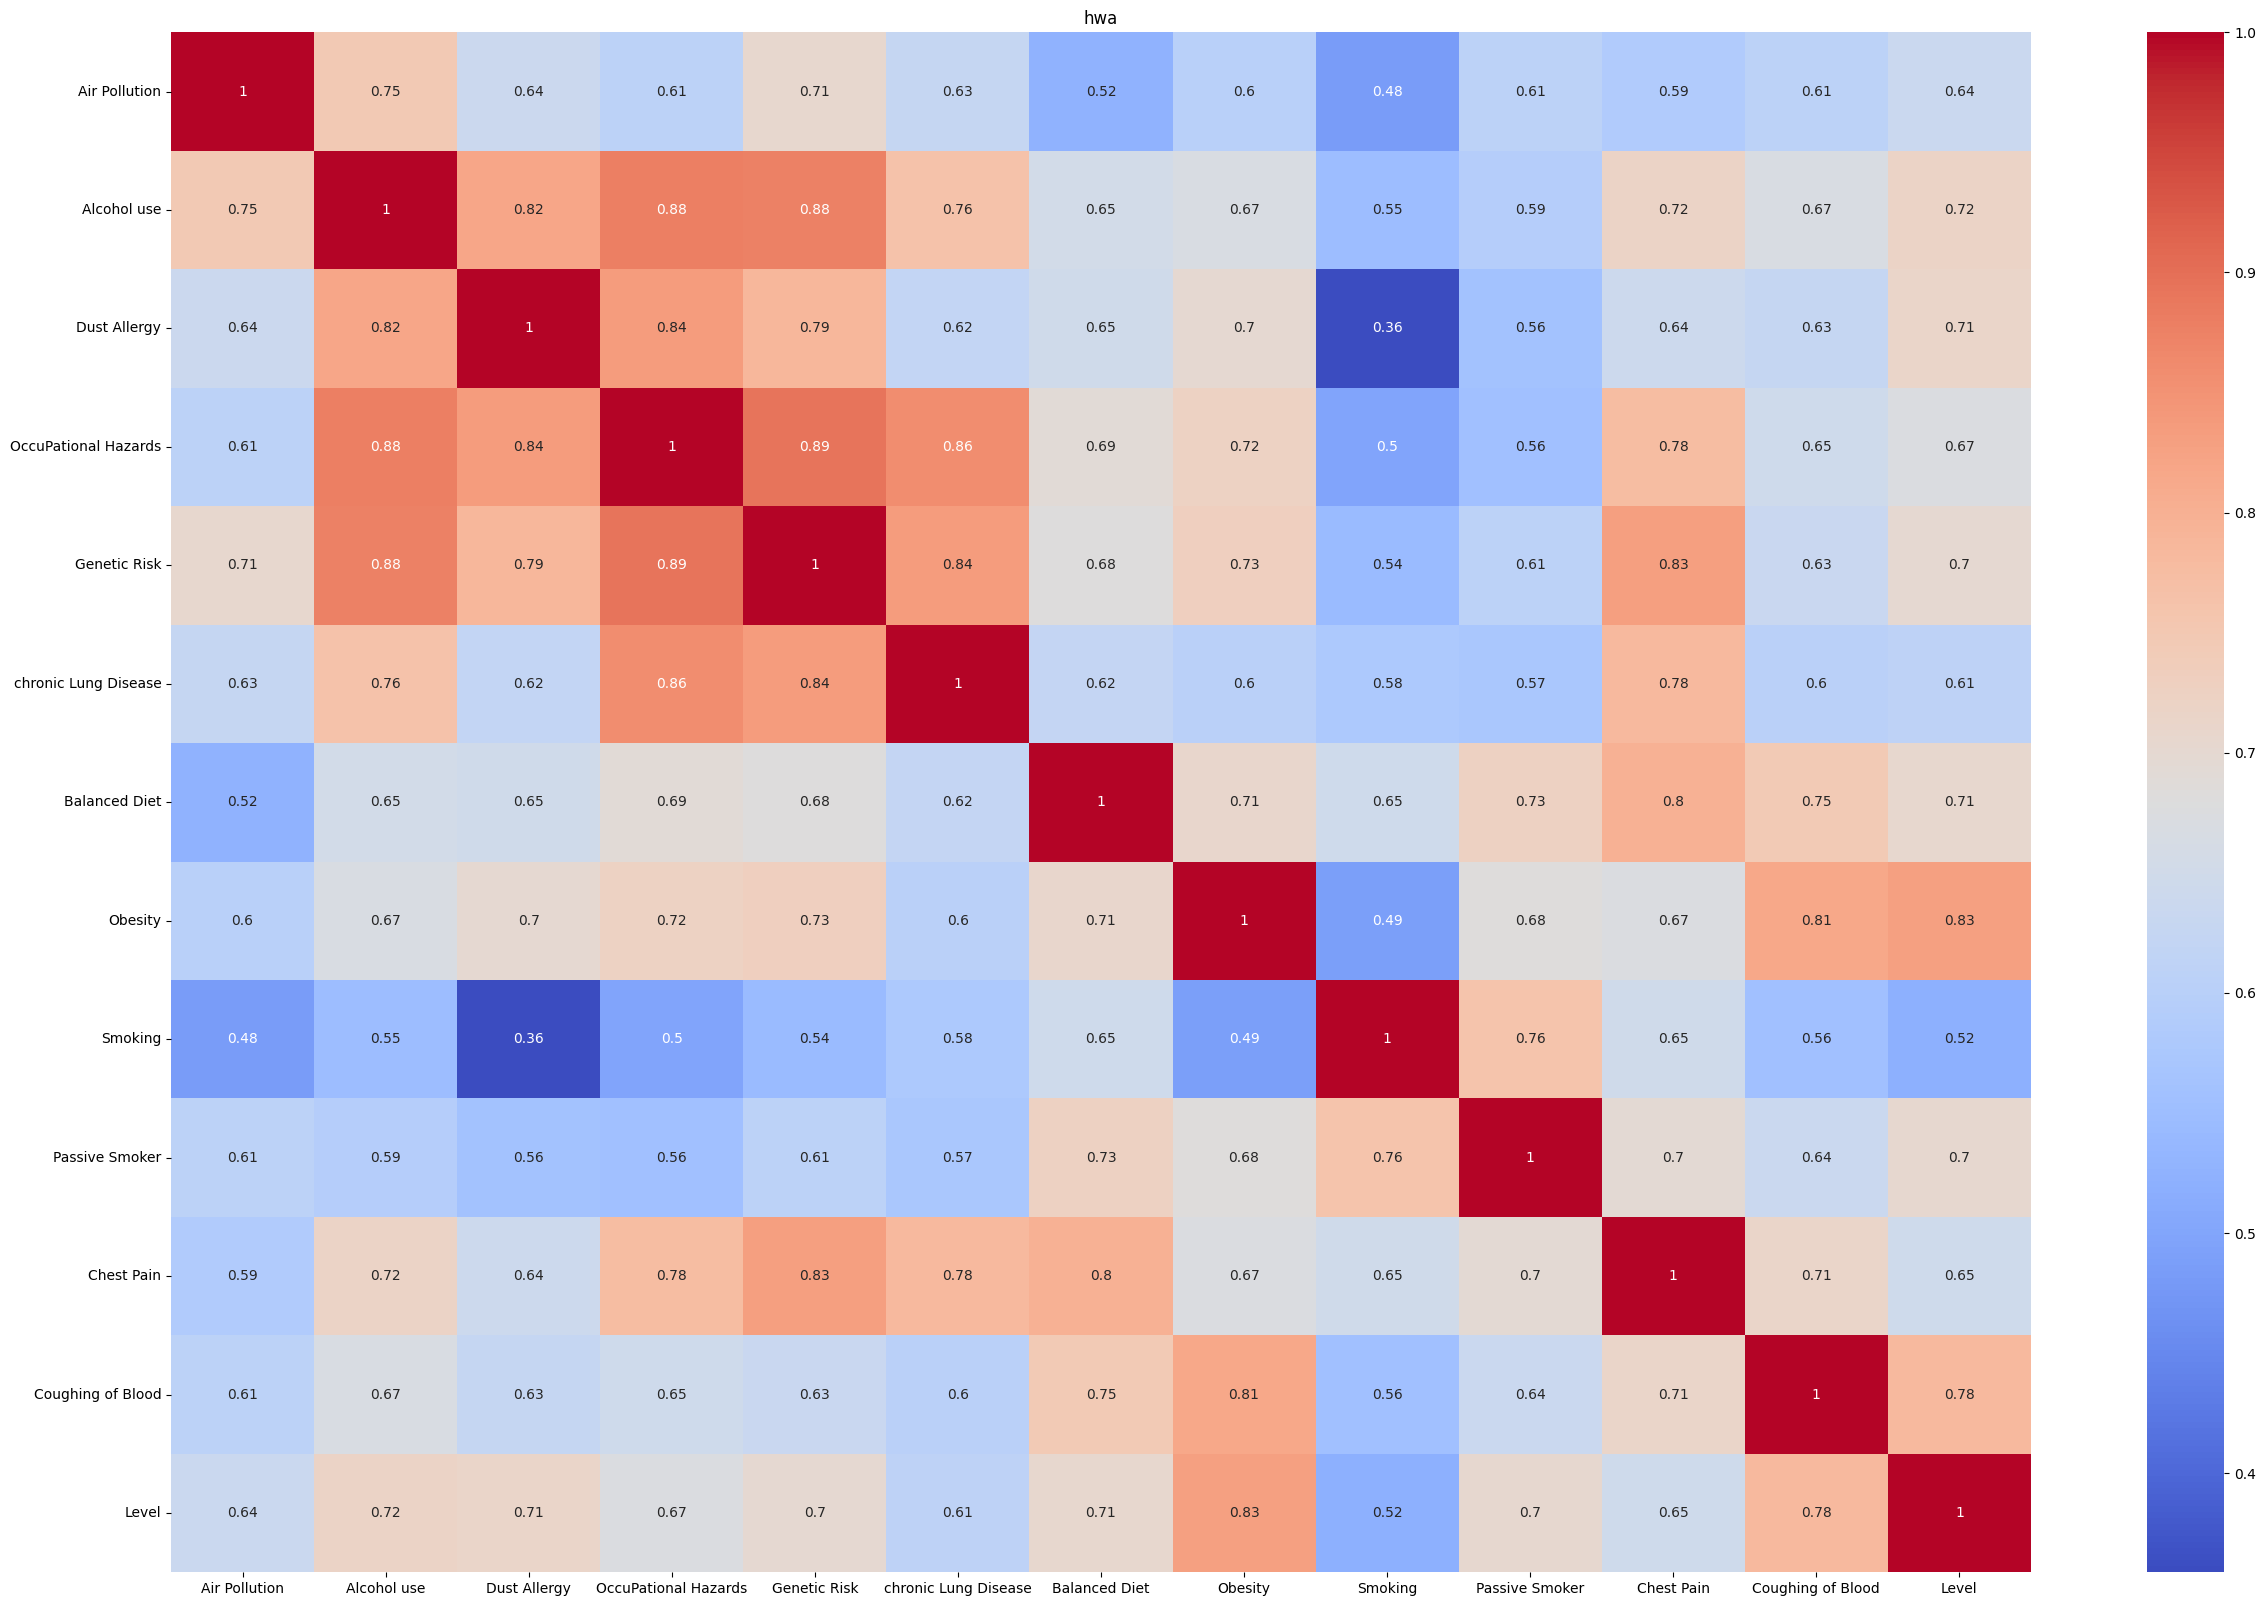

In [131]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("hwa")
plt.show()


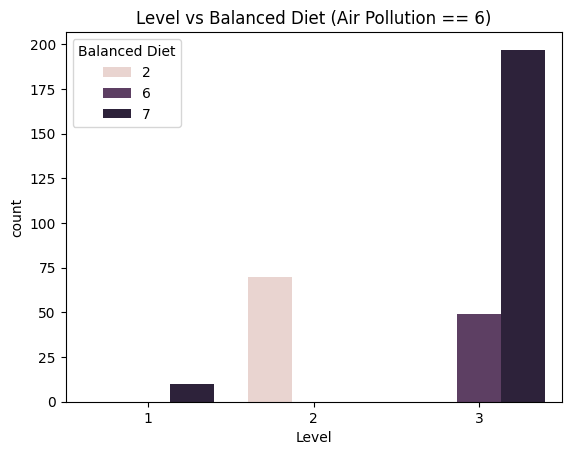

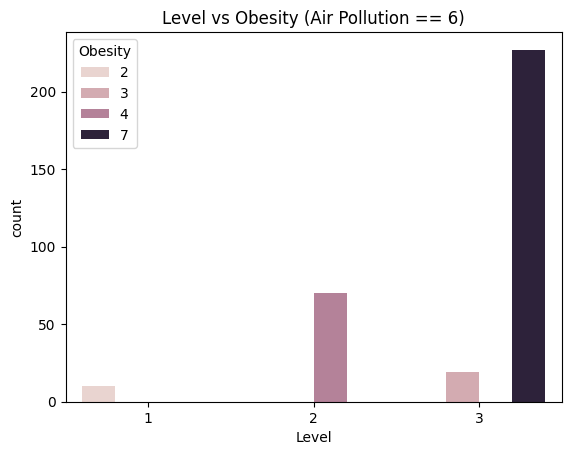

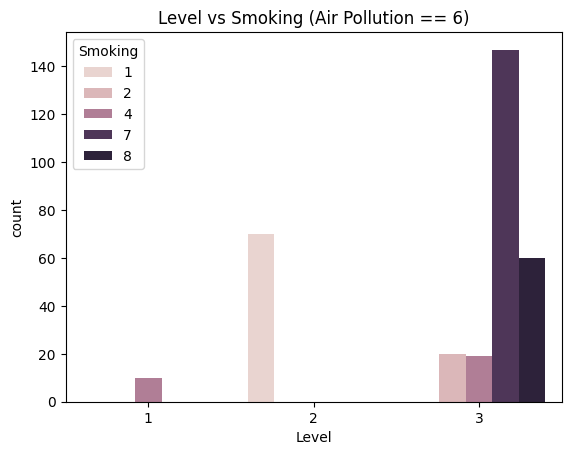

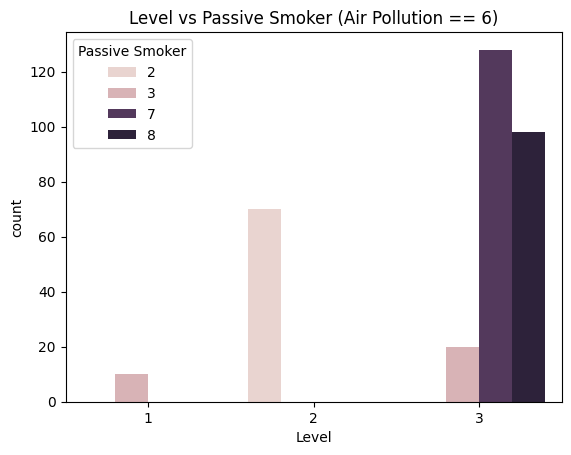

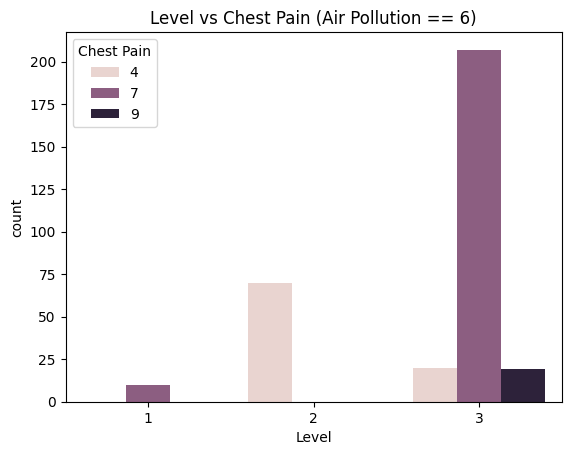

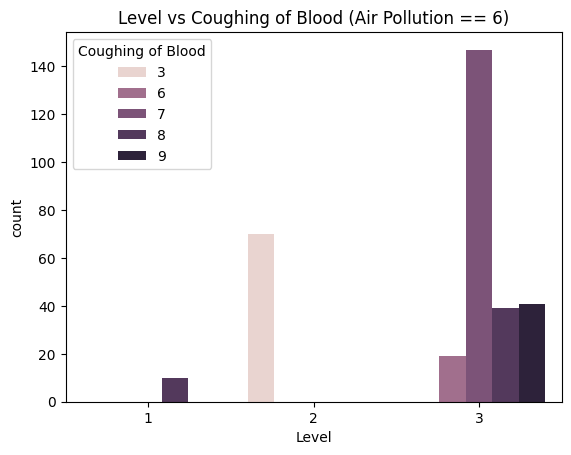

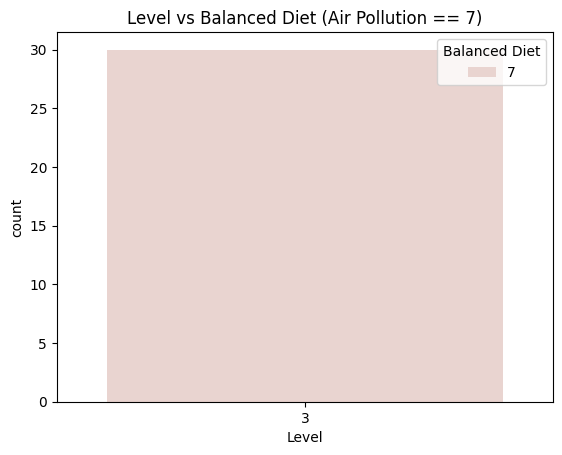

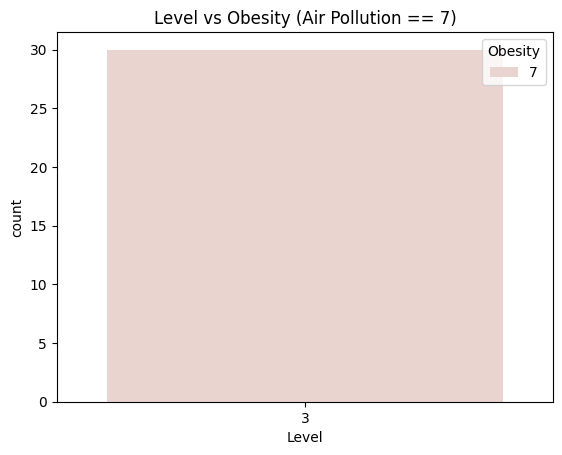

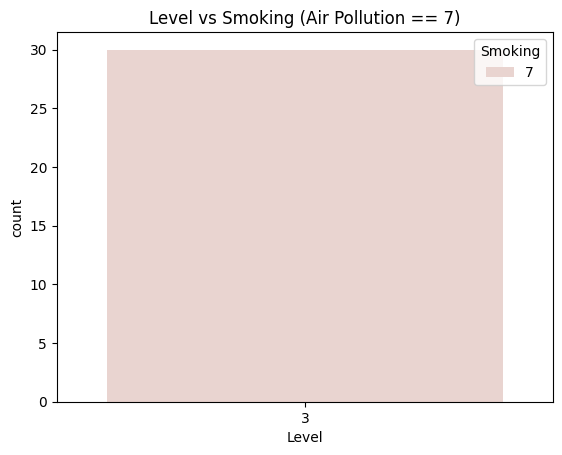

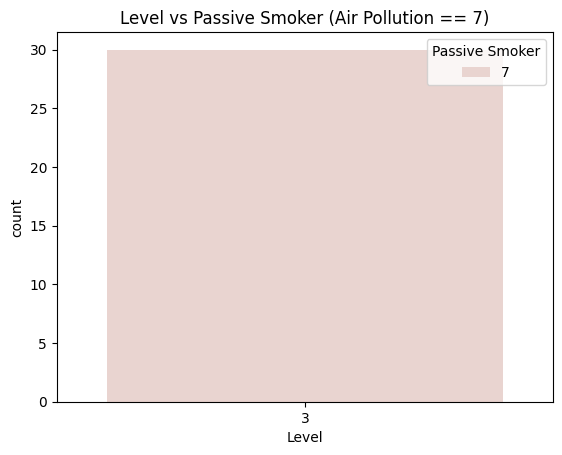

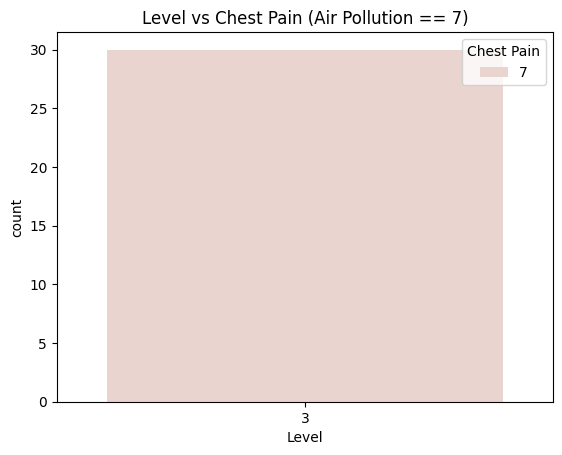

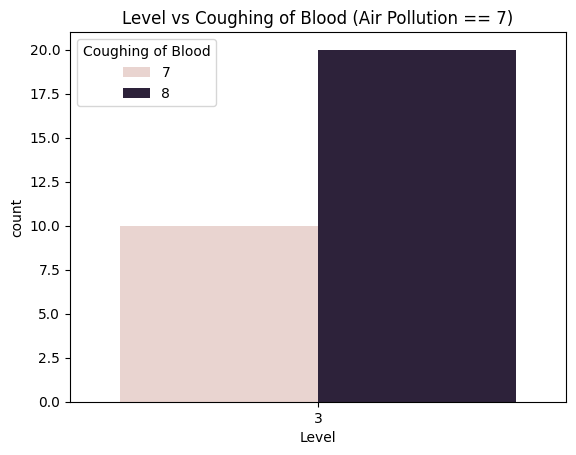

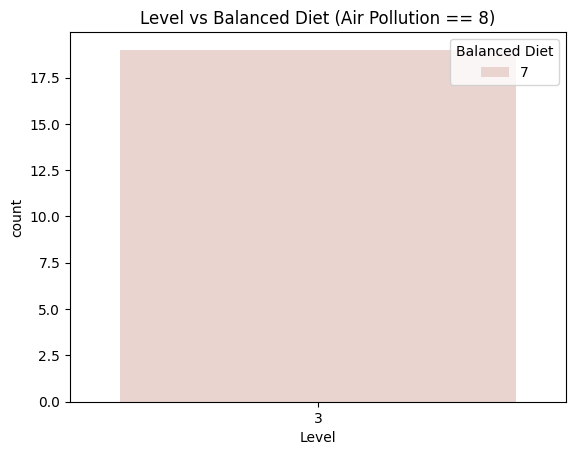

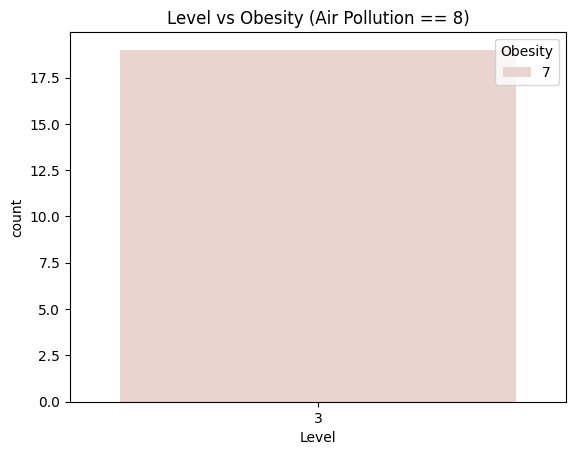

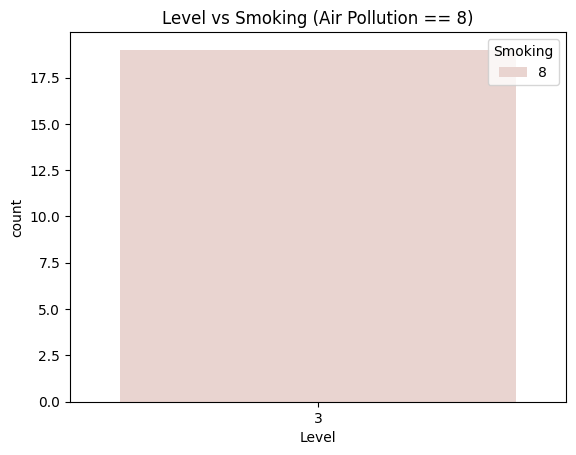

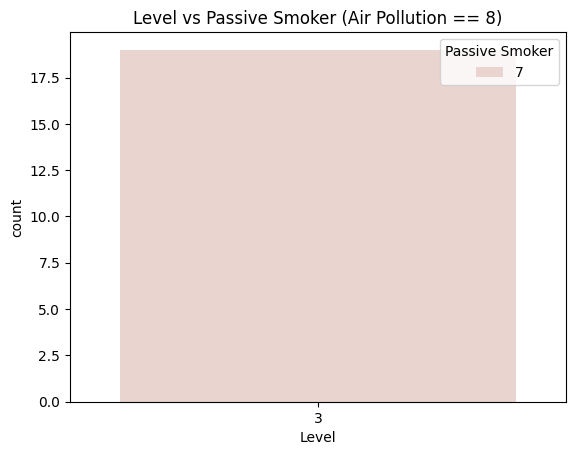

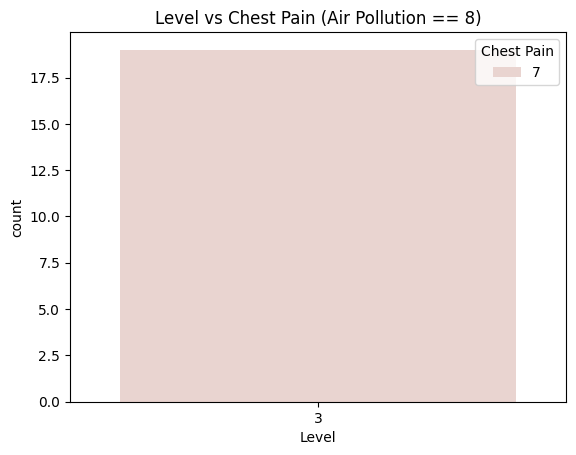

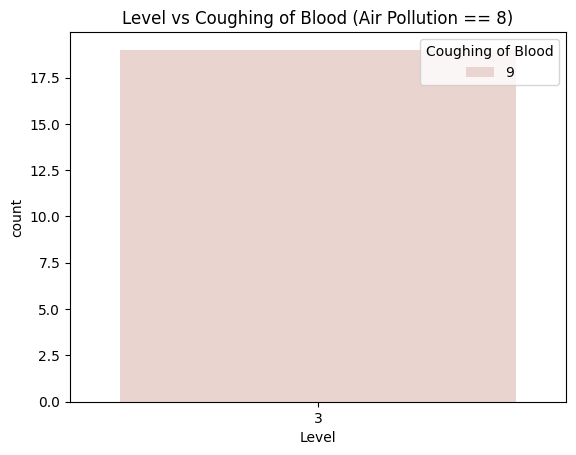

In [132]:

# 상관 행렬 확인 (숫자형 컬럼만)
# corr_matrix_6 = air_pollution_6.corr(numeric_only=True)
# plt.figure(figsize=(30, 20))
# sns.heatmap(corr_matrix_6, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for Air Pollution == 6')
# plt.show()

# 'Level'에 따른 분포 확인
def level(i):
    sns.countplot(data=air_pollution, x='Level', hue='Balanced Diet')
    plt.title(f'Level vs Balanced Diet (Air Pollution == {i})')
    plt.show()

    sns.countplot(data=air_pollution, x='Level', hue='Obesity')
    plt.title(f'Level vs Obesity (Air Pollution == {i})')
    plt.show()

    sns.countplot(data=air_pollution, x='Level', hue='Smoking')
    plt.title(f'Level vs Smoking (Air Pollution == {i})')
    plt.show()

    sns.countplot(data=air_pollution, x='Level', hue='Passive Smoker')
    plt.title(f'Level vs Passive Smoker (Air Pollution == {i})')
    plt.show()

    sns.countplot(data=air_pollution, x='Level', hue='Chest Pain')
    plt.title(f'Level vs Chest Pain (Air Pollution == {i})')
    plt.show()

    sns.countplot(data=air_pollution, x='Level', hue='Coughing of Blood')
    plt.title(f'Level vs Coughing of Blood (Air Pollution == {i})')
    plt.show()

# Air Pollution이 6~8인 데이터 필터링
for i in range(6, 9):
    air_pollution = df[df['Air Pollution'] == i]
    level(i)

# 필요하면 다른 컬럼들도 추가 가능!


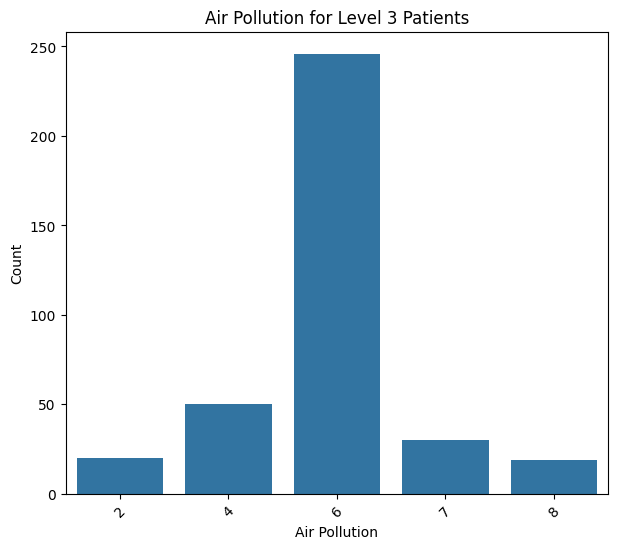

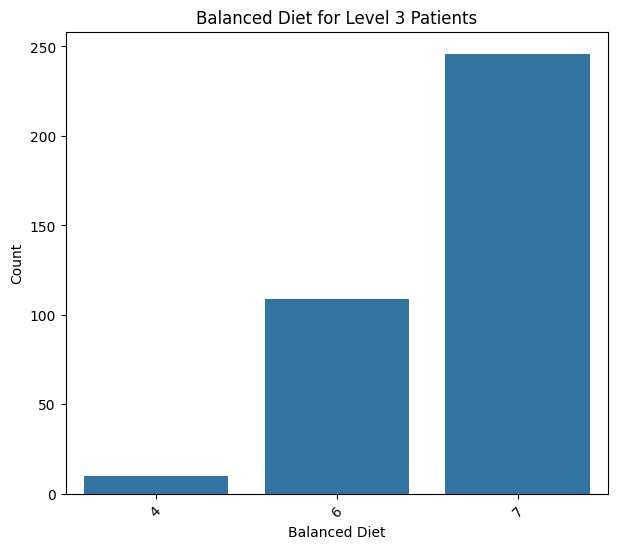

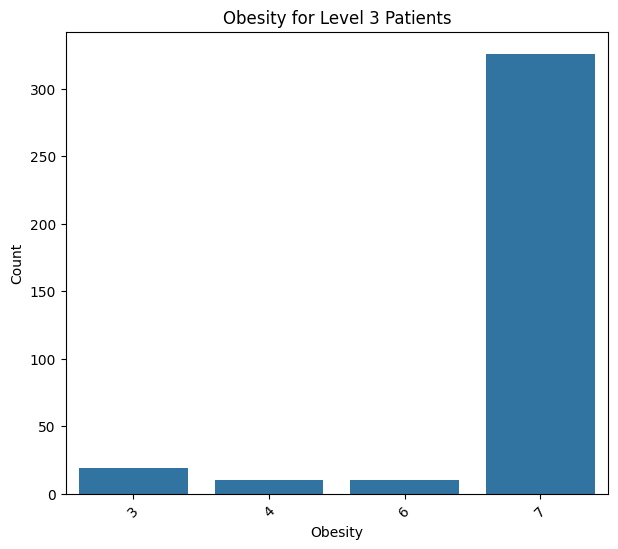

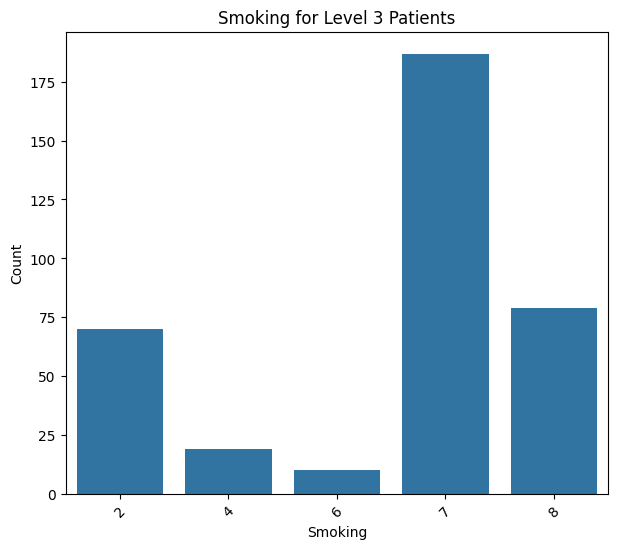

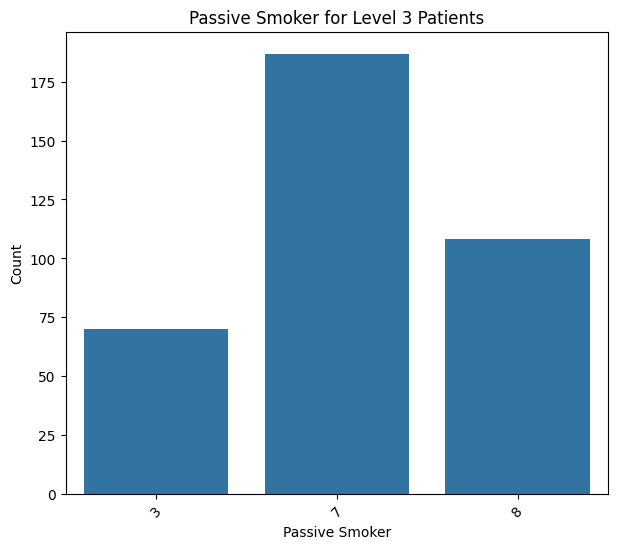

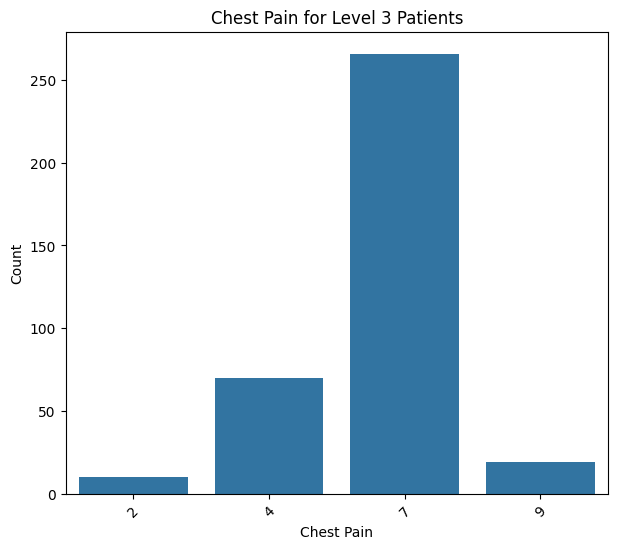

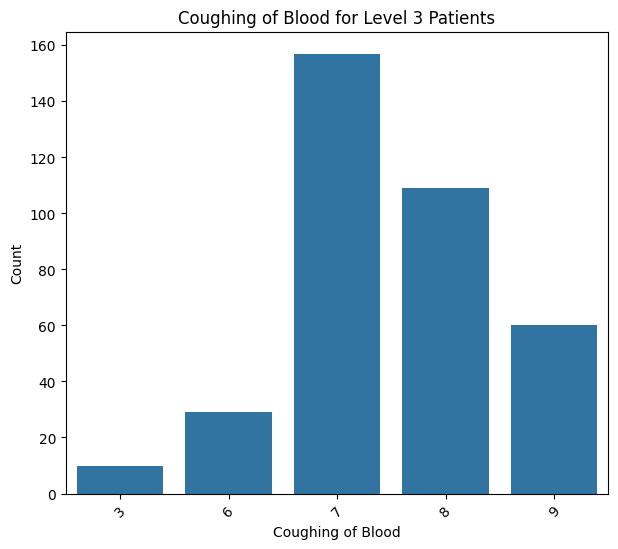

In [133]:
# Level 3인 환자 필터링
lv_3 = df[df['Level'] == 3]

# 시각화할 컬럼들 (비만, 음주, 균형잡인 식단, 먼지 알레르기, 유전적 요인, 흡연, 간접흡연)
columns_to_plot = ['Air Pollution', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood']  # 필요한 컬럼들

# 각 컬럼에 대해 countplot 시각화
for col in columns_to_plot:
    plt.figure(figsize=(7, 6))
    sns.countplot(x=col, data=lv_3)
    plt.title(f'{col} for Level 3 Patients')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # 카테고리 이름이 길면 회전시켜서 보기 좋게
    plt.show()



In [134]:
# Air Pollution >= 6인 데이터 필터링
cancer_patients = df[(df['Level'] == 3)]

# 특정 컬럼만 선택하여 10개씩 출력
selected_columns = ['Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Air Pollution', 'Level']  # 출력할 컬럼 목록

for i in range(0, len(cancer_patients), 10):
    print(cancer_patients.iloc[i:i + 10][selected_columns])  # 10개씩, 특정 컬럼만 출력
    print('-' * 50)  # 구분선 (가독성 UP)


    Passive Smoker  Chest Pain  Coughing of Blood  Air Pollution  Level
2                3           4                  8              4      3
3                7           7                  8              7      3
4                7           7                  9              6      3
5                3           4                  8              4      3
10               8           7                  7              6      3
11               8           7                  7              6      3
13               7           7                  8              6      3
17               7           7                  8              6      3
18               7           7                  7              6      3
20               7           9                  6              6      3
--------------------------------------------------
    Passive Smoker  Chest Pain  Coughing of Blood  Air Pollution  Level
21               3           4                  8              4      3
22           

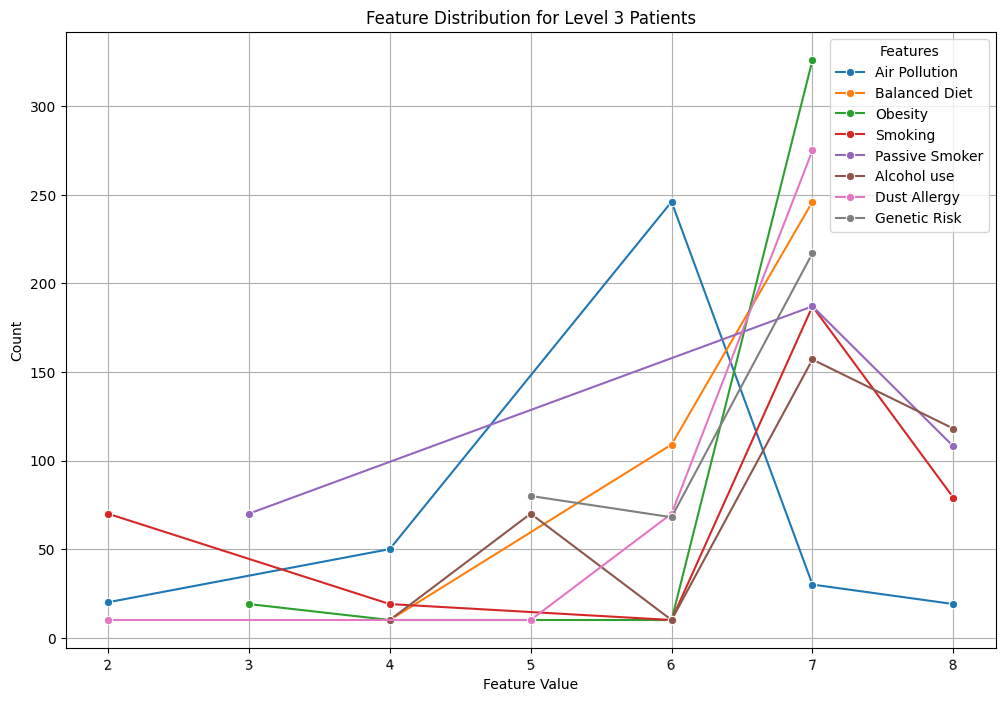

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Level 3인 환자 필터링
lv_3 = df[df['Level'] == 3]

# 시각화할 컬럼들
columns_to_plot = ['Air Pollution', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Alcohol use', 'Dust Allergy', 'Genetic Risk']

# 하나의 그래프로 모든 컬럼 시각화
plt.figure(figsize=(12, 8))
for col in columns_to_plot:
    value_counts = lv_3[col].value_counts().sort_index()
    sns.lineplot(x=value_counts.index, y=value_counts.values, marker='o', label=col)

plt.title('Feature Distribution for Level 3 Patients')
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.xticks(rotation=5)
plt.legend(title='Features')
plt.grid(True)
plt.show()
